In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import random
from sklearn.model_selection import train_test_split

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
!ls "/content/drive/My Drive/Dataset/"

ls: cannot access '/content/drive/My Drive/Dataset/': No such file or directory


In [ ]:
train_data = pd.read_excel('/content/drive/My Drive/Dataset/MergeResult.xlsx')

In [ ]:
train_data

,username,acctdesc,location,following,followers,totaltweets,usercreatedts,tweetcreatedts,Sarcastic,text,hashtags
0,Jatsland,"→ \nℳera☺ Attitude मेरी 😎शान है,\n\nAur ℳerä द...",आपणो राजस्थान {नागौरी},124,2884,70421,2014-05-08 05:11:58,2020-06-22 14:36:47,0,🍃🌼🍃🌼🍃🌼🍃🌼🍃🌼🍃\n\nकभी न बुझती है \nवो प्यास है #ज...,"[{'text': 'जिंदगी', 'indices': [60, 67]}, {'te..."
1,lifestyleship7,"Daily Lifestyle से संबंधित Educational, Busine...",India,0,1,13,2020-06-15 11:17:47,2020-06-22 14:29:26,0,"डिप्रेशन के शुरुआती आठ लक्षण, उदाहरण और इलाज\n...","[{'text': 'depression', 'indices': [75, 86]}, ..."
2,Benish_shex,I may not be perfect but atlest I m not fake.....,"Karachi, Pakistan",186,154,5232,2016-05-26 08:01:53,2020-06-22 14:26:56,0,@FaiziJee98 Aaj apki saalgirah hy nahi 🙊😛 or j...,"[{'text': 'happy', 'indices': [72, 78]}, {'tex..."
3,Priyanshi_001,#My_life_my_rules_and_my_attitude.... \n\n#जी_...,🌹💫💕💫🌹,7,1111,51312,2019-05-06 03:31:52,2020-06-22 14:23:01,0,🍃🌼🍃🌼🍃🌼🍃🌼🍃🌼🍃\n\nकभी न बुझती है \nवो प्यास है #ज...,"[{'text': 'जिंदगी', 'indices': [60, 67]}, {'te..."
4,ParthikaH,I mAKe My OwN wAy,India 🇮🇳,62,9,28,2019-06-18 18:17:23,2020-06-22 14:21:30,0,#Happy rathyatra https://t.co/flLVnffvOJ,"[{'text': 'Happy', 'indices': [0, 6]}]"
...,...,...,...,...,...,...,...,...,...,...,...
16174,voice_les,"मजबूर, मजदूर, लाचार और किसानों पर सच्चाई से लि...","Patna, India",1128,1093,9914,2015-01-06 21:43:32,2020-06-15 09:14:14,1,बड़े शौक से हमारी मजबूरी का मजाक उड़ाते हो।\nम...,"[{'text': 'कटाक्ष', 'indices': [86, 93]}]"
16175,alokverma17,"Keynote Speaker, Consultant. Blogger. Facilita...","Gurgaon, Haryana",247,164,345,2009-12-05 16:49:02,2020-06-15 09:12:47,1,सुख के सब साथी \nदुख में न कोई ...\n\nकिसी के ...,"[{'text': 'SushantNoMore', 'indices': [140, 15..."
16176,_Harsh_Jr,Nikal Pehli Fursaat Mein 😎 ||\nHarHarMahadev 🙏...,Erangel,114,143,448,2020-04-08 13:01:51,2020-06-15 06:01:59,1,Sone Ki Chain Important Nhi Hoti\nBalki\nChain...,"[{'text': 'Sarcasm', 'indices': [72, 80]}]"
16177,BUDHLADA_,NATION BUILDER AND CHANGE MAKER THROUGH TECHNO...,India,94,30,1894,2017-09-30 05:18:20,2020-06-15 05:37:45,1,@IACAbhi @myvivek1989 kya baat kr rhe ho..\n\n...,"[{'text': 'SARCASM', 'indices': [111, 119]}]"


In [ ]:
train_data['username']

0              Jatsland
1        lifestyleship7
2           Benish_shex
3         Priyanshi_001
4             ParthikaH
              ...      
16174         voice_les
16175       alokverma17
16176         _Harsh_Jr
16177         BUDHLADA_
16178       Ad_lover_Dv
Name: username, Length: 16179, dtype: object

In [ ]:
from sklearn.utils import shuffle
train_data_new = shuffle(train_data)

In [ ]:
train_data_new

,username,acctdesc,location,following,followers,totaltweets,usercreatedts,tweetcreatedts,Sarcastic,text,hashtags
7978,ivijyendrasingh,"राष्ट्रवादी हु , शायर हु खुद के जज़्बातों की कल...",विदिशा,4891,4964,298011,2013-12-15 09:07:23,2020-06-14 14:08:55,0,कुछ नहीं है हारने को\n लेकिन\n#SMILE क...,"[{'text': 'SMILE', 'indices': [57, 63]}]"
14514,UntoldStorY06,"Cricketer, Prankster, Lyricist , Theatre Freak...","Ufa, Russia",379,7963,290714,2013-11-30 12:47:34,2020-06-20 16:36:16,1,आज ट्विटर पर किसी यूजर के ट्वीट में एक शब्द दे...,[]
1821,SaritaDineshTBM,NaN,"Rajasthan, India",60,59,1612,2015-10-13 08:35:25,2020-06-14 17:45:09,0,राजस्थान विश्वविद्यालय की आन बान शान वर्तमान छ...,[]
5921,IAmGulista,"हम चुपके से दबे पाँव,तेरी कहानी से निकल जाएँगे.","Lucknow, India",132,16623,1611,2017-03-16 05:48:31,2020-06-14 15:42:19,0,🤔🤔🤔🤔🤔🤔🤔🤔🤔\nइतनी नफ़रत कहाँ से लाते हो तुम लोग ...,[]
13418,akkysingh_,Backbencher wale memer hai hum..😅 |...,"Hapur, India",3,13,169,2019-12-20 09:14:26,2020-06-18 17:42:15,1,"Pehle Log muh se bol kar taana marte the, \n ...","[{'text': 'sarcasm', 'indices': [163, 171]}, {..."
...,...,...,...,...,...,...,...,...,...,...,...
14702,Vijaypurswani5,"भारत माता की जय🚩🚩, हिंदू शेर हूँ, मेरा जीवन दे...","Bhopal, India",1417,796,14535,2019-06-09 07:08:50,2020-06-18 09:36:28,1,अगर आज नेहरू जी होते तो शी जिनपिंग की बीवी को ...,[]
2618,SumerDaryapurk1,🇮🇳हिन्दुस्तानी🇮🇳\nचाय कभी भी \nपढ़ाई से नफरत 😭...,NaN,190,72,2438,2019-09-22 06:45:56,2020-06-20 18:41:36,0,Jo dost baap hu mai tera wale dialogs bolte ha...,"[{'text': 'HAPPY', 'indices': [59, 65]}]"
2008,Rti14Soni,Name -Aarti Soni Home town Jaipur Rajasthan oc...,pune Maharstra,2,0,2,2019-11-21 10:32:29,2020-06-14 11:01:59,0,#dear #ShushantSinghRajput #aaj yakeen hua jen...,"[{'text': 'dear', 'indices': [0, 5]}, {'text':..."
788,sidhantRR,♡ Don't be too sweet otherwise they will eat y...,🇮🇳,252,5313,222922,2018-02-22 06:09:45,2020-06-19 17:07:57,0,#नींद खुली है जबसे\n #दुख रही है #आँखें_म...,"[{'text': 'नींद', 'indices': [17, 22]}, {'text..."


In [ ]:
train_data_new = pd.DataFrame(train_data)

In [ ]:
train_data_new.drop(['username','acctdesc','location','following','followers','totaltweets','usercreatedts','tweetcreatedts','hashtags'], axis = 1)

,Sarcastic,text
0,0,🍃🌼🍃🌼🍃🌼🍃🌼🍃🌼🍃\n\nकभी न बुझती है \nवो प्यास है #ज...
1,0,"डिप्रेशन के शुरुआती आठ लक्षण, उदाहरण और इलाज\n..."
2,0,@FaiziJee98 Aaj apki saalgirah hy nahi 🙊😛 or j...
3,0,🍃🌼🍃🌼🍃🌼🍃🌼🍃🌼🍃\n\nकभी न बुझती है \nवो प्यास है #ज...
4,0,#Happy rathyatra https://t.co/flLVnffvOJ
...,...,...
16174,1,बड़े शौक से हमारी मजबूरी का मजाक उड़ाते हो।\nम...
16175,1,सुख के सब साथी \nदुख में न कोई ...\n\nकिसी के ...
16176,1,Sone Ki Chain Important Nhi Hoti\nBalki\nChain...
16177,1,@IACAbhi @myvivek1989 kya baat kr rhe ho..\n\n...


In [ ]:
sarcastic = train_data_new[train_data_new['Sarcastic']==1]

In [ ]:
non_sarcastic = train_data_new[train_data_new['Sarcastic']==0]

In [ ]:
len(sarcastic)

6051

In [ ]:
len(non_sarcastic)

10128

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


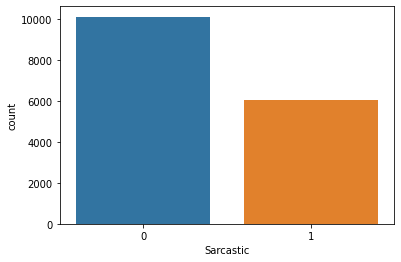

In [ ]:
import seaborn as sns
sns.countplot(train_data_new['Sarcastic'], label = "Count");

In [ ]:
sentences = train_data['text'].tolist()

In [ ]:
sentences

['🍃🌼🍃🌼🍃🌼🍃🌼🍃🌼🍃\n\nकभी न बुझती है \nवो प्यास है #जिंदगी\n#निराशा को मिटाती \nएक आस है जिंदगी,\nमिल जाती है #खुशियाँ \nकिसी को जहाँ भर की\nतो किसी के लिए \nहर #पल_उदास है जिंदगी।\n\n#जिन्दगी \n\n🍃🌼🍃🌼🍃🌼🍃🌼🍃🌼🍃',
 'डिप्रेशन के शुरुआती आठ लक्षण, उदाहरण और इलाज\n.\n\nhttps://t.co/dDyXBM5OVZ…/\n\n#depression #anxiety #mentalhealth #mentalhealthawareness #love #sad #mentalillness #selfcare #ptsd #depressed https://t.co/K4PhW4Au4r',
 '@FaiziJee98 Aaj apki saalgirah hy nahi 🙊😛 or jis din hogi us din k liye #happy #wala #birthday😄😄🎂🍫',
 '🍃🌼🍃🌼🍃🌼🍃🌼🍃🌼🍃\n\nकभी न बुझती है \nवो प्यास है #जिंदगी\n#निराशा को मिटाती \nएक आस है जिंदगी,\nमिल जाती है #खुशियाँ \nकिसी को जहाँ भर की\nतो किसी के लिए \nहर #पल_उदास है जिंदगी।\n\n#जिन्दगी \n\n🍃🌼🍃🌼🍃🌼🍃🌼🍃🌼🍃',
 '#Happy rathyatra https://t.co/flLVnffvOJ',
 'यह सोचकर #दुखी न हों कि,\n\n                 #लोग आपको नहीं #समझते.\n\nक्योंकि...\n\n               #कांटे से #वजन को...\n\n                                 #मापा जा सकता है, \n\n                 #गुणवत्ता को नहीं !!',


In [ ]:
labels = train_data['Sarcastic']

In [ ]:
vocab_size = 10000
embedding_size = 8
max_length = 12
trunc_type='post'
padding_type = 'post'
oov_tok = "<OOV>"
training_size = 12000

In [ ]:
training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

In [ ]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [ ]:
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

In [ ]:
training_padded

array([[ 970,   49,   56, ..., 1315,    9, 1636],
       [2558,    8, 4958, ...,    4,    5, 4962],
       [4638,  734, 3156, ..., 1148, 1620, 2465],
       ...,
       [  40,  197,    7, ...,  241,    8,  189],
       [  40,  197,    7, ...,  241,    8,  189],
       [  40,  197,    7, ...,  241,    8,  189]], dtype=int32)

In [ ]:
training_labels

array([0, 0, 0, ..., 1, 1, 1])

In [ ]:
testing_padded

array([[  40,  197,    7, ...,  241,    8,  189],
       [  40,  197,    7, ...,  241,    8,  189],
       [  40,  197,    7, ...,  241,    8,  189],
       ...,
       [9361,  137, 4956, ..., 4677, 2101,  527],
       [9363, 9364,  601, ..., 3171,  609,  783],
       [2077,  156, 4957, ...,  156, 4957,  174]], dtype=int32)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_size, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,  return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(1e-5),
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 12, 8)             80000     
_________________________________________________________________
bidirectional (Bidirectional (None, 12, 128)           37376     
_________________________________________________________________
bidirectional_1 (Bidirection (None, 64)                41216     
_________________________________________________________________
dense (Dense)                (None, 64)                4160      
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 162,817
Trainable params: 162,817
Non-trainable params: 0
__________________________________________________

In [ ]:
num_epochs = 10
history = model.fit(training_padded,training_labels, epochs=num_epochs, validation_data=(testing_padded,testing_labels), verbose=1)

Epoch 1/10
375/375 [==============================] - 12s 21ms/step - loss: 0.6739 - accuracy: 0.8411 - val_loss: 0.7677 - val_accuracy: 0.0000e+00
Epoch 2/10
375/375 [==============================] - 7s 17ms/step - loss: 0.5684 - accuracy: 0.8440 - val_loss: 1.2349 - val_accuracy: 0.0000e+00
Epoch 3/10
375/375 [==============================] - 6s 17ms/step - loss: 0.4202 - accuracy: 0.8440 - val_loss: 1.7323 - val_accuracy: 0.0000e+00
Epoch 4/10
375/375 [==============================] - 6s 17ms/step - loss: 0.3765 - accuracy: 0.8440 - val_loss: 1.5701 - val_accuracy: 0.0000e+00
Epoch 5/10
375/375 [==============================] - 7s 17ms/step - loss: 0.3237 - accuracy: 0.8440 - val_loss: 1.3826 - val_accuracy: 0.0000e+00
Epoch 6/10
375/375 [==============================] - 6s 17ms/step - loss: 0.2635 - accuracy: 0.8718 - val_loss: 1.2069 - val_accuracy: 0.5020
Epoch 7/10
375/375 [==============================] - 6s 17ms/step - loss: 0.2259 - accuracy: 0.9247 - val_loss: 1.0485 -

In [ ]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

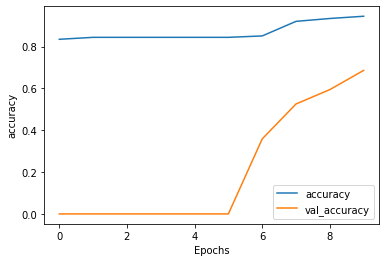

In [ ]:
plot_graphs(history, 'accuracy')

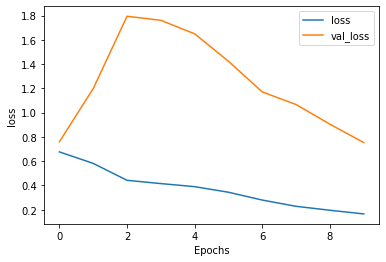

In [ ]:
plot_graphs(history, 'loss')

In [ ]:
!mkdir -p saved_model_bi_lstm
model.save('/content/drive/MyDrive/Sarcasm Detection - 8th Sem/Hindi Models/saved_model_bi_lstm/my_model')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Sarcasm Detection - 8th Sem/Hindi Models/saved_model_bi_lstm/my_model/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Sarcasm Detection - 8th Sem/Hindi Models/saved_model_bi_lstm/my_model/assets


In [ ]:
!ls '/content/drive/MyDrive/Sarcasm Detection - 8th Sem/Hindi Models/saved_model_bi_lstm/my_model'

assets	keras_metadata.pb  saved_model.pb  variables


In [ ]:
new_model = tf.keras.models.load_model('/content/drive/MyDrive/Sarcasm Detection - 8th Sem/Hindi Models/saved_model_bi_lstm/my_model')

In [ ]:
loss, acc = new_model.evaluate(testing_padded, testing_labels,verbose=1)
print('Restored model, accuracy: {:5.2f}%'.format(100 * acc))

131/131 [==============================] - 2s 7ms/step - loss: 0.7534 - accuracy: 0.6860
Restored model, accuracy: 68.60%


In [ ]:
model_2 = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_size, input_length=max_length),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(1e-5),
              metrics=['accuracy'])
model_2.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 12, 8)             80000     
_________________________________________________________________
lstm_6 (LSTM)                (None, 64)                18688     
_________________________________________________________________
dense_10 (Dense)             (None, 64)                4160      
_________________________________________________________________
dropout_5 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 65        
Total params: 102,913
Trainable params: 102,913
Non-trainable params: 0
_________________________________________________________________


In [ ]:
num_epochs = 10
history_2 = model_2.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=1)

#verbose=0 will show you nothing (silent)

# verbose=1 will show you an animated progress bar like this:

#progres_bar : [=========>......]

#verbose=2 will just mention the number of epoch like this:

# 1/10..

Epoch 1/10
375/375 [==============================] - 6s 11ms/step - loss: 0.6857 - accuracy: 0.7919 - val_loss: 0.7196 - val_accuracy: 0.0000e+00
Epoch 2/10
375/375 [==============================] - 4s 10ms/step - loss: 0.6516 - accuracy: 0.8440 - val_loss: 0.8124 - val_accuracy: 0.0000e+00
Epoch 3/10
375/375 [==============================] - 4s 10ms/step - loss: 0.5394 - accuracy: 0.8440 - val_loss: 1.2811 - val_accuracy: 0.0000e+00
Epoch 4/10
375/375 [==============================] - 4s 10ms/step - loss: 0.4056 - accuracy: 0.8440 - val_loss: 1.6538 - val_accuracy: 0.0000e+00
Epoch 5/10
375/375 [==============================] - 4s 10ms/step - loss: 0.3641 - accuracy: 0.8440 - val_loss: 1.5575 - val_accuracy: 0.0000e+00
Epoch 6/10
375/375 [==============================] - 4s 10ms/step - loss: 0.3227 - accuracy: 0.8440 - val_loss: 1.4128 - val_accuracy: 0.0000e+00
Epoch 7/10
375/375 [==============================] - 4s 10ms/step - loss: 0.2795 - accuracy: 0.8472 - val_loss: 1.253

In [ ]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history_2.history[string])
  plt.plot(history_2.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

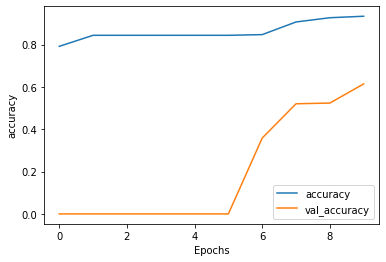

In [ ]:
plot_graphs(history_2, 'accuracy')

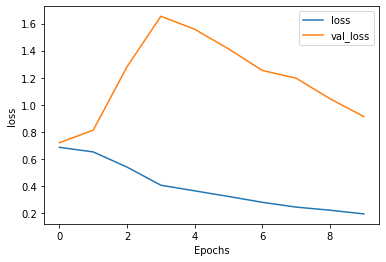

In [ ]:
plot_graphs(history_2, 'loss')

In [ ]:
!mkdir -p saved_model_lstm
model_2.save('/content/drive/MyDrive/Sarcasm Detection - 8th Sem/Hindi Models/saved_model_lstm/my_model')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Sarcasm Detection - 8th Sem/Hindi Models/saved_model_lstm/my_model/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Sarcasm Detection - 8th Sem/Hindi Models/saved_model_lstm/my_model/assets


In [ ]:
!ls '/content/drive/MyDrive/Sarcasm Detection - 8th Sem/Hindi Models/saved_model_lstm/my_model'

assets	keras_metadata.pb  saved_model.pb  variables


In [ ]:
new_model_2 = tf.keras.models.load_model('/content/drive/MyDrive/Sarcasm Detection - 8th Sem/Hindi Models/saved_model_lstm/my_model')

In [ ]:
loss, acc = new_model_2.evaluate(testing_padded, testing_labels,verbose=1)
print('Restored model, accuracy: {:5.2f}%'.format(100 * acc))

131/131 [==============================] - 1s 3ms/step - loss: 0.9128 - accuracy: 0.6143
Restored model, accuracy: 61.43%


In [ ]:
model_3 = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_size, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(1e-5),
              metrics=['accuracy'])
model_3.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 12, 8)             80000     
_________________________________________________________________
bidirectional_5 (Bidirection (None, 128)               37376     
_________________________________________________________________
dense_12 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_6 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 65        
Total params: 125,697
Trainable params: 125,697
Non-trainable params: 0
_________________________________________________________________


In [ ]:
num_epochs = 10
history_3 = model_3.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=1)

#verbose=0 will show you nothing (silent)

# verbose=1 will show you an animated progress bar like this:

#progres_bar : [=========>......]

#verbose=2 will just mention the number of epoch like this:

# 1/10..

Epoch 1/10
375/375 [==============================] - 9s 16ms/step - loss: 0.6814 - accuracy: 0.8163 - val_loss: 0.7363 - val_accuracy: 0.0000e+00
Epoch 2/10
375/375 [==============================] - 5s 14ms/step - loss: 0.6294 - accuracy: 0.8440 - val_loss: 0.8993 - val_accuracy: 0.0000e+00
Epoch 3/10
375/375 [==============================] - 5s 14ms/step - loss: 0.5005 - accuracy: 0.8440 - val_loss: 1.4902 - val_accuracy: 0.0000e+00
Epoch 4/10
375/375 [==============================] - 5s 13ms/step - loss: 0.4165 - accuracy: 0.8440 - val_loss: 1.7217 - val_accuracy: 0.0000e+00
Epoch 5/10
375/375 [==============================] - 5s 13ms/step - loss: 0.3877 - accuracy: 0.8440 - val_loss: 1.6254 - val_accuracy: 0.0000e+00
Epoch 6/10
375/375 [==============================] - 5s 13ms/step - loss: 0.3486 - accuracy: 0.8440 - val_loss: 1.4780 - val_accuracy: 0.0000e+00
Epoch 7/10
375/375 [==============================] - 5s 13ms/step - loss: 0.3018 - accuracy: 0.8440 - val_loss: 1.299

In [ ]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history_3.history[string])
  plt.plot(history_3.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

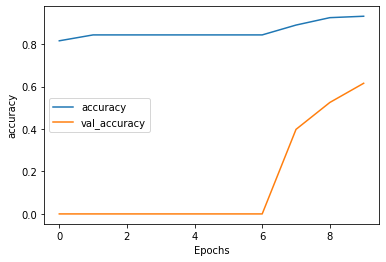

In [ ]:
plot_graphs(history_3, 'accuracy')

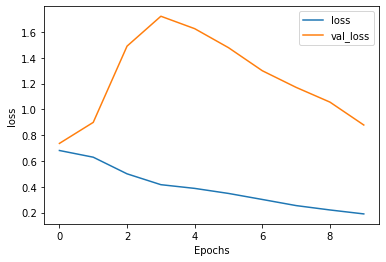

In [ ]:
plot_graphs(history_3, 'loss')

In [ ]:
!mkdir -p saved_model_bi_lstm_1
model_3.save('/content/drive/MyDrive/Sarcasm Detection - 8th Sem/Hindi Models/saved_model_bi_lstm_1/my_model')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Sarcasm Detection - 8th Sem/Hindi Models/saved_model_bi_lstm_1/my_model/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Sarcasm Detection - 8th Sem/Hindi Models/saved_model_bi_lstm_1/my_model/assets


In [ ]:
!ls '/content/drive/MyDrive/Sarcasm Detection - 8th Sem/Hindi Models/saved_model_bi_lstm_1/my_model'

assets	keras_metadata.pb  saved_model.pb  variables


In [ ]:
new_model_3 = tf.keras.models.load_model('/content/drive/MyDrive/Sarcasm Detection - 8th Sem/Hindi Models/saved_model_bi_lstm_1/my_model')

In [ ]:
loss, acc = new_model_3.evaluate(testing_padded, testing_labels,verbose=1)
print('Restored model, accuracy: {:5.2f}%'.format(100 * acc))

131/131 [==============================] - 1s 4ms/step - loss: 0.8788 - accuracy: 0.6159
Restored model, accuracy: 61.59%


In [ ]:
model_4 = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_size, input_length=max_length),
    tf.keras.layers.SimpleRNN(64),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model_4.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(1e-5),
              metrics=['accuracy'])
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 12, 8)             80000     
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 64)                4672      
_________________________________________________________________
dense_6 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 65        
Total params: 88,897
Trainable params: 88,897
Non-trainable params: 0
_________________________________________________________________


In [ ]:
num_epochs = 10
history_4 = model_4.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=1)

#verbose=0 will show you nothing (silent)

# verbose=1 will show you an animated progress bar like this:

#progres_bar : [=========>......]

#verbose=2 will just mention the number of epoch like this:

# 1/10..

Epoch 1/10
375/375 [==============================] - 4s 7ms/step - loss: 0.6719 - accuracy: 0.6821 - val_loss: 0.7851 - val_accuracy: 0.0000e+00
Epoch 2/10
375/375 [==============================] - 3s 7ms/step - loss: 0.4992 - accuracy: 0.8425 - val_loss: 1.5367 - val_accuracy: 0.0000e+00
Epoch 3/10
375/375 [==============================] - 2s 6ms/step - loss: 0.4078 - accuracy: 0.8440 - val_loss: 1.4140 - val_accuracy: 0.0000e+00
Epoch 4/10
375/375 [==============================] - 3s 7ms/step - loss: 0.3411 - accuracy: 0.8835 - val_loss: 1.2579 - val_accuracy: 0.3702
Epoch 5/10
375/375 [==============================] - 2s 6ms/step - loss: 0.2753 - accuracy: 0.9191 - val_loss: 1.0180 - val_accuracy: 0.5736
Epoch 6/10
375/375 [==============================] - 2s 6ms/step - loss: 0.2254 - accuracy: 0.9339 - val_loss: 0.8380 - val_accuracy: 0.6839
Epoch 7/10
375/375 [==============================] - 2s 6ms/step - loss: 0.1932 - accuracy: 0.9392 - val_loss: 0.7142 - val_accuracy: 0

In [ ]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history_4.history[string])
  plt.plot(history_4.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

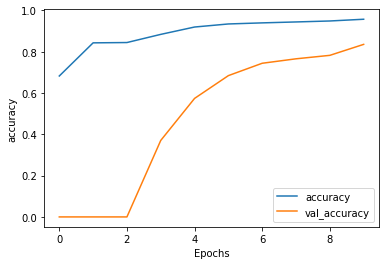

In [ ]:
plot_graphs(history_4, 'accuracy')

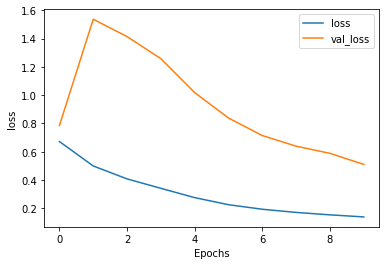

In [ ]:
plot_graphs(history_4, 'loss')

In [ ]:
!mkdir -p saved_model_rnn
model_4.save('/content/drive/MyDrive/Sarcasm Detection - 8th Sem/Hindi Models/saved_model_rnn/my_model')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Sarcasm Detection - 8th Sem/Hindi Models/saved_model_rnn/my_model/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Sarcasm Detection - 8th Sem/Hindi Models/saved_model_rnn/my_model/assets


In [ ]:
!ls '/content/drive/MyDrive/Sarcasm Detection - 8th Sem/Hindi Models/saved_model_rnn/my_model'

assets	keras_metadata.pb  saved_model.pb  variables


In [ ]:
new_model_4 = tf.keras.models.load_model('/content/drive/MyDrive/Sarcasm Detection - 8th Sem/Hindi Models/saved_model_rnn/my_model')

In [ ]:
loss, acc = new_model_4.evaluate(testing_padded, testing_labels,verbose=1)
print('Restored model, accuracy: {:5.2f}%'.format(100 * acc))

131/131 [==============================] - 0s 2ms/step - loss: 0.5102 - accuracy: 0.8351
Restored model, accuracy: 83.51%
